<a href="https://colab.research.google.com/github/Sylwiaes/machine-learning-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

Elementy sieci neuronowej:
*   wagi - elementy trenowane w naszym modelu
*   funkcja straty - pozwala kontrolować błąd i wskazywać, czy nasz model się uczy, czy nie
*   optymalizator - pozwala uczyć się naszej sieci

Najprostsza sieć neuronowa - Perceptron, składa się z 1 neuronu: suma iloczynu cech i wag jest przekazywana do funkcji aktywacji - jest to nazwane predykcją. 
Model Perceptronu jest zbliżony do modelu regresji logistycznej.






![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuronowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [ ]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential #pozwala budować modele sekwencyjne, gdzie układamy warstwa po warstwie
from tensorflow.keras.layers import Flatten #pozwala wypłaszczać nasze dane
from tensorflow.keras.layers import Dense #pozwala na łączenie danych
from tensorflow.keras.layers import Dropout #kontroluje przeuczenie modelu, porzuca powne neurony w warstwie ukrytej

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.5.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data() #zwraca od razu zbiór treningowy i testowy, więc nie ma potrzeby dzieć danych train, test.split

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
print(X_train[0]) #wyświetlenie zbioru treningowego; dążymy do tego, aby nauczyć naszą sieć rozpoznawać na podstawie takich danych konkretnych klas

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [ ]:
X_train = X_train / 255. #dzielimy przez liczbę 255, bo to największa liczba pixela jaką możemy uzyskać
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

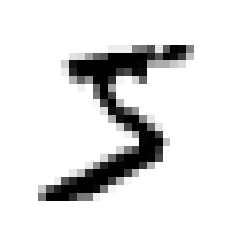

In [ ]:
plt.imshow(X_train[0], cmap='gray_r') #wyświetlamy obraz 28x28 pixeli
plt.axis('off')

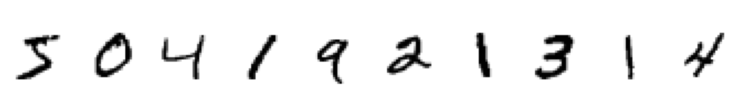

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [ ]:
model = Sequential() #budujemy model, który będzie rozpoznawać klasę na podstawie takich danych
model.add(Flatten(input_shape=(28, 28))) #dodajemy każdą kolejną warstwę
model.add(Dense(units=128, activation='relu')) #warstwa gęsto połączona zawierająca 128 neuronów ukrytych i funkcję aktywacji relu, która zeruje wartości ujemne, a wartości dodatnie 
#pozostawia bez zmian
model.add(Dropout(0.2)) #funkcja, która porzuca 20% neuronów w warstwie
model.add(Dense(units=10, activation='softmax')) #dodajemy warstwę wynikową, która będzie zawierać 10 neuronów; 
#funkcja aktywacji softmax zwróci nam prawdopodobieństwo poszczególnej klasy

model.compile(optimizer='adam',   #kompilujemy nasz model
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#tabela przedstawia informacje na temat każdej warstwy; Param oznacza ile parametrów jest trenowanych w naszej warstwie; warstwa flatten nie zawiera żadnych elementów 
#None jest zarezerwowane dla liczby naszych próbek 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> Trenowanie modelu

In [ ]:
history = model.fit(X_train, y_train, epochs=5) #epochs oznacza ile razy nasz cały zbiór danych przejdzie przez całą sieć

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.9028
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.9087
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - accuracy: 0.9114
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2847 - accuracy: 0.9165
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.9198


### <a name='a7'></a> Ocena modelu

In [ ]:
model.evaluate(X_test, y_test, verbose=2) #biblioteka Keras przelicza dokładność

313/313 - 0s - loss: 0.2355 - accuracy: 0.9321


[0.2354515641927719, 0.9320999979972839]

In [ ]:
metrics = pd.DataFrame(history.history) #tworzymy sobie obiekt DF, który będzie przechowywać funkcję straty i accuracy
metrics

,loss,accuracy
0,0.332360,0.902850
1,0.314835,0.908667
2,0.301601,0.911433
3,0.284659,0.916517
4,0.274514,0.919817


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)
#w modelu będzie nam zależało na minimalizacji funkcji straty i maksymalizacji dokładności

### <a name='a8'></a> Predykcja na podstawie modelu

In [ ]:
model.predict(X_test) #funkcja predict zwróci nam wartość prawdopodobieństwa dla każdej klasy; dla przykładu, gdy mamy 10 klas, to w wierszu będziemy mieć 10 wartości

array([[0.00009834076 , 0.000000033139, 0.000101043726, ..., 0.9973672     , 0.000017460714, 0.0011998971  ],
       [0.00043126187 , 0.000015630349, 0.98766977    , ..., 0.000000002764, 0.0015428999  , 0.000000003116],
       [0.000003019283, 0.98536706    , 0.0045171184  , ..., 0.0035333147  , 0.0026144446  , 0.00025601653 ],
       ...,
       [0.00000012053 , 0.00000247922 , 0.000012303706, ..., 0.00046779081 , 0.0056806076  , 0.048248902   ],
       [0.00041749823 , 0.00036717532 , 0.000062234976, ..., 0.00000846488 , 0.224584      , 0.000083865554],
       [0.00007463163 , 0.000000000355, 0.00032083105 , ..., 0.00000000102 , 0.000001352836, 0.000000541261]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_test) #funkcja, która zwróci nam od razu konkretne klasy
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1) #tworzymy obiekt DF, aby sprawdzić, które elementy model źle sklasyfikował
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
misclassified = pred[pred['y_test'] != pred['y_pred']] #porównujemy, gdzie te dane się nie zgadzają
misclassified.index[:10]

Int64Index([8, 33, 63, 92, 149, 151, 195, 211, 217, 233], dtype='int64')

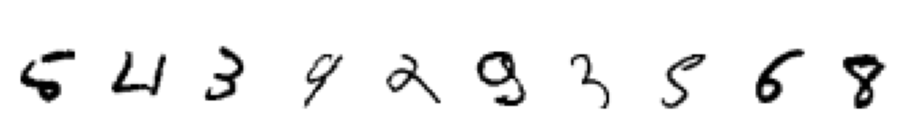

In [ ]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()